## MobileNetV2 model 
---
![mobnv2](../picture/MobileNetV2.png)
MobileNetV2 is a convolutional neural network architecture that seeks to perform well on mobile devices. It is based on an inverted residual structure where the residual connections are between the bottleneck layers. The intermediate expansion layer uses lightweight depthwise convolutions to filter features as a source of non-linearity. As a whole, the architecture of MobileNetV2 contains the initial fully convolution layer with 32 filters, followed by 19 residual bottleneck layers. [Source](https://paperswithcode.com/method/mobilenetv2#:~:text=MobileNetV2%20is%20a%20convolutional%20neural,are%20between%20the%20bottleneck%20layers.)

In [1]:
# Import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import Image

# Open file
import os
import PIL
from random import seed
# Model CNN (Deep learning network)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,\
GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Create function plot loss function and accuracy score graph
def plot_graph(model_values):
    ''' 
    Input : Model_values of keras.callbacks.History
    Return : Graph of Loss function and accuracy score between training dataset and vaildation dataset
    '''
    # Subplots
    fig, ax = plt.subplots(1, 2, figsize=(14,5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(model_values.history['loss'], label='Training Loss');
    plt.plot(model_values.history['val_loss'], label='Testing Loss');
    plt.legend(fontsize=12, loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss');
    
    # Plot MSE
    plt.subplot(1, 2, 2)
    
    plt.plot(model_values.history['accuracy'], label='Training Accuracy')
    plt.plot(model_values.history['val_accuracy'], label='Validation Accuracy')
    
    plt.legend(fontsize=12, loc='lower right')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy');

### 00 First, check GPU.
---

In [1]:
# https://www.tensorflow.org/guide/keras/sequential_model
# Due to we use Keras Sequential API, 
# We want to check GPU first before training our model for 
# impore efficiency and reduce time. 
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2416320522326823235
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2914307278
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2279516392386192809
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


### 01 Open dataset 
---

In [2]:
# set state seed
seed(42)

# Open path file of dataset 
dataset_path_new = "dataset_train_valid_test"

train_dir = os.path.join(dataset_path_new, "train")
valid_dir = os.path.join(dataset_path_new, "valid")
test_dir = os.path.join(dataset_path_new, "test")

### 02 Preprocessing image dataset 
---

In [3]:
# Set parameter of image 
# https://github.com/keras-team/keras/issues/8090#issuecomment-335155737
batch_size = 50 # Set the batch size for epoch cycle
img_height = 128 # Set the height of the picture
img_width = 128 # Set the width of the picture

# Rescale pixel to reduce image size before using in model
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)

In [4]:
# Create training dataset 
train_dataset = data_gen_train.flow_from_directory(train_dir,
                                                   class_mode="categorical",
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size)
 

# Create validation dataset 
valid_dataset = data_gen_valid.flow_from_directory(valid_dir,
                                                   class_mode="categorical",
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size)

# Create testing dataset 
test_dataset = data_gen_test.flow_from_directory(test_dir,
                                                   class_mode="categorical",
                                                   target_size=(img_height, img_width),
                                                   batch_size=batch_size)

Found 7796 images belonging to 4 classes.
Found 816 images belonging to 4 classes.
Found 805 images belonging to 4 classes.


---

### 03 MobileNetV2 model training 
---

#### Transfer learning

In [22]:
# https://keras.io/api/applications/mobilenet/#mobilenetv2-function
# import MobileNetV2 model form keras API
# set input size of image of trianing is 128x128 (smallest size of MobileNetV2)
# due to we want to use transfer learning process 
# we must add `include_top=False` because we wan to add our input data 
# we decide default weigh for mode
mobv2_model = tf.keras.applications.MobileNetV2(input_shape=(128,128,3),
                                                include_top=False, # Transfer learning
                                                weights="imagenet")

In [23]:
# model summary
# Total params: 2,257,984
# Trainable params: 2,223,872
# Non-trainable params: 34,112
mobv2_model.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [24]:
# fix weights and bias 
# train specifically custom head
mobv2_model.trainable=False

#### Add custom head and output layers 

In [25]:
# Create output layer 
# We have 4 classes in our output we decide using activation="softmax" 
# for multi classification.
# Before output layer we decide use GlobalAveragePooling2D as 
# one type of flatten layer.
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(mobv2_model.output) # flatten
prediction_layer = tf.keras.layers.Dense(units=4, activation="softmax")(average_pooling_layer)

In [26]:
# Add Input layer and output layer 
model = tf.keras.models.Model(inputs=mobv2_model.input, 
                                    outputs=prediction_layer)

In [27]:
# Total params: 2,263,108
# Trainable params: 5,124 # add input layers and  output layers
# Non-trainable params: 2,257,984 --> fix layers
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']         

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 16, 16, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 16, 16, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 16, 16, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 16, 16, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 8, 8, 384)    0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 8, 8, 384)   3456        ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 8, 8, 384)   1536        ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 8, 8, 96)    384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 8, 8, 576)    55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 8, 8, 576)   2304        ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 8, 8, 576)    0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 4, 4, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 4, 4, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 4, 4, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 4, 4, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [28]:
# Compile the model         
model.compile(loss="categorical_crossentropy", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [29]:
# Save checkpoints during training
checkpoint_path = "../model/mobilenetV2/mobilenetv2_cp/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 mode="max",
                                                 verbose=1,
                                                 monitor="val_accuracy")

In [17]:
# Training model
# make sure you truely save checkpoint_path
history = model.fit(train_dataset,
          epochs=25,
          validation_data=valid_dataset,
          callbacks=[cp_callback])

Epoch 1/25
156/156 [==============================] - ETA: 0s - loss: 0.5267 - accuracy: 0.8012
Epoch 1: saving model to ../model/mobilenetV2/mobilenetv2_cp\cp.ckpt
156/156 [==============================] - 325s 2s/step - loss: 0.5267 - accuracy: 0.8012 - val_loss: 0.3930 - val_accuracy: 0.8529
Epoch 2/25
156/156 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.8999
Epoch 2: saving model to ../model/mobilenetV2/mobilenetv2_cp\cp.ckpt
156/156 [==============================] - 318s 2s/step - loss: 0.2845 - accuracy: 0.8999 - val_loss: 0.3075 - val_accuracy: 0.8934
Epoch 3/25
156/156 [==============================] - ETA: 0s - loss: 0.2338 - accuracy: 0.9206
Epoch 3: saving model to ../model/mobilenetV2/mobilenetv2_cp\cp.ckpt
156/156 [==============================] - 307s 2s/step - loss: 0.2338 - accuracy: 0.9206 - val_loss: 0.2973 - val_accuracy: 0.8897
Epoch 4/25
156/156 [==============================] - ETA: 0s - loss: 0.2023 - accuracy: 0.9309
Epoch 4: savi

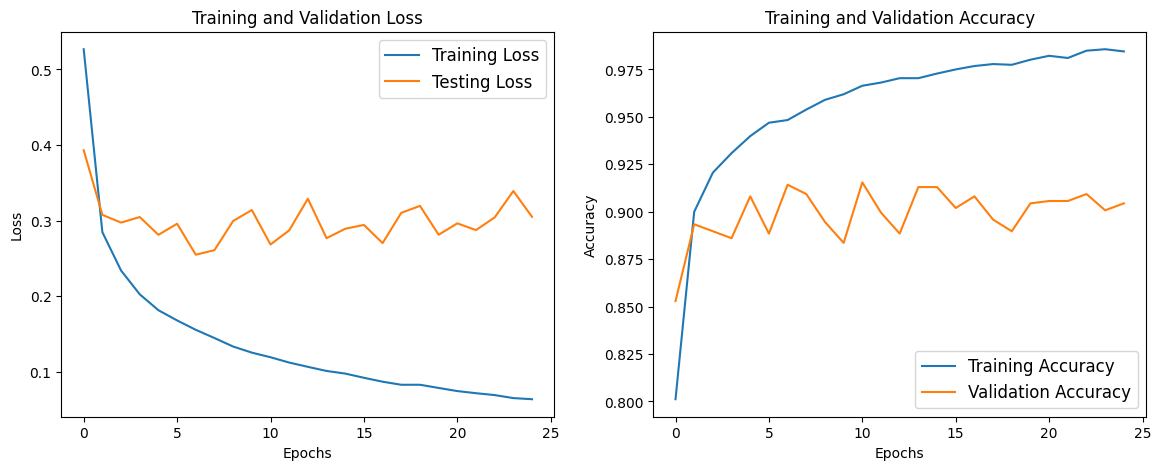

In [19]:
# plot graph 
plot_graph(history)


# overfitting between training and validation 
# Final accuracy after training 25 epochs is score in training 0.98% 
# and vaildaion 0.90%
# Loss function after training 25 epochs is score in training 0.06% 
# and vaildaion 0.31%
# Goof perfomance than baseline model 

In [59]:
# convert the history.history dict to a pandas DataFrame:    
hist_df = pd.DataFrame(history.history) 
# save history to csv:  
hist_csv_file = '../model/mobilenetV2/history_mobilenetv2_tf.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [33]:
# save model
model.save("../model/mobilenetV2/mobilenetv2.h5")

---

#### Fine tuning
---

We decide to fix the weight in our model 0 - 100 layers because that are related with structure of image but after layer related with feature of image. 

In [60]:
img_height = 128 # Set the height of the picture
img_width = 128 # Set the width of the picture

# load model
mobv2_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width,3),
                                              include_top=False, # Transfer learning
                                              weights="imagenet",
                                              )  

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(mobv2_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in mobv2_model.layers[:fine_tune_at]:
    layer.trainable = False

# Make sure you have frozen the correct layers
for i, layer in enumerate(mobv2_model.layers):
    if i >= 95:
        print(i, layer.name, layer.trainable)

# Add input layers and output layers
average_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()(mobv2_model.output) # flatten
prediction_layer = tf.keras.layers.Dense(units=4, activation="softmax")(average_pooling_layer)
fineture_model = tf.keras.models.Model(inputs=mobv2_model.input, 
                                     outputs=prediction_layer)

# Compile the model         
fineture_model.compile(loss="categorical_crossentropy", 
                       optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                       metrics=['accuracy'])

Number of layers in the base model:  154
95 block_10_depthwise_relu False
96 block_10_project False
97 block_10_project_BN False
98 block_11_expand False
99 block_11_expand_BN False
100 block_11_expand_relu True
101 block_11_depthwise True
102 block_11_depthwise_BN True
103 block_11_depthwise_relu True
104 block_11_project True
105 block_11_project_BN True
106 block_11_add True
107 block_12_expand True
108 block_12_expand_BN True
109 block_12_expand_relu True
110 block_12_depthwise True
111 block_12_depthwise_BN True
112 block_12_depthwise_relu True
113 block_12_project True
114 block_12_project_BN True
115 block_12_add True
116 block_13_expand True
117 block_13_expand_BN True
118 block_13_expand_relu True
119 block_13_pad True
120 block_13_depthwise True
121 block_13_depthwise_BN True
122 block_13_depthwise_relu True
123 block_13_project True
124 block_13_project_BN True
125 block_14_expand True
126 block_14_expand_BN True
127 block_14_expand_relu True
128 block_14_depthwise True
129 

In [61]:
# Save checkpoints during training
# follow value of vaildation scorce 
checkpoint = tf.keras.callbacks.ModelCheckpoint('../model/mobilenetV2/mobilenetv2_ft.h5', 
                             monitor= 'val_accuracy', 
                             mode= 'max', 
                             save_best_only = True, 
                             verbose= 1)

In [62]:
# Training model
# make sure you truely save checkpoint_path
history_ft = fineture_model.fit(train_dataset,  
                             epochs=10, 
                             validation_data=valid_dataset, 
                             callbacks=[checkpoint]) # fine tune continue form transfer learning

Epoch 1/10
156/156 [==============================] - ETA: 0s - loss: 0.3376 - accuracy: 0.8864
Epoch 1: val_accuracy improved from -inf to 0.67157, saving model to ../model/mobilenetV2\mobilenetv2_ft.h5
156/156 [==============================] - 323s 2s/step - loss: 0.3376 - accuracy: 0.8864 - val_loss: 4.3126 - val_accuracy: 0.6716
Epoch 2/10
156/156 [==============================] - ETA: 0s - loss: 0.1406 - accuracy: 0.9547
Epoch 2: val_accuracy did not improve from 0.67157
156/156 [==============================] - 319s 2s/step - loss: 0.1406 - accuracy: 0.9547 - val_loss: 7.0255 - val_accuracy: 0.4718
Epoch 3/10
156/156 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9647
Epoch 3: val_accuracy did not improve from 0.67157
156/156 [==============================] - 320s 2s/step - loss: 0.0999 - accuracy: 0.9647 - val_loss: 13.6060 - val_accuracy: 0.3811
Epoch 4/10
156/156 [==============================] - ETA: 0s - loss: 0.0914 - accuracy: 0.9691
Epoch 4: 

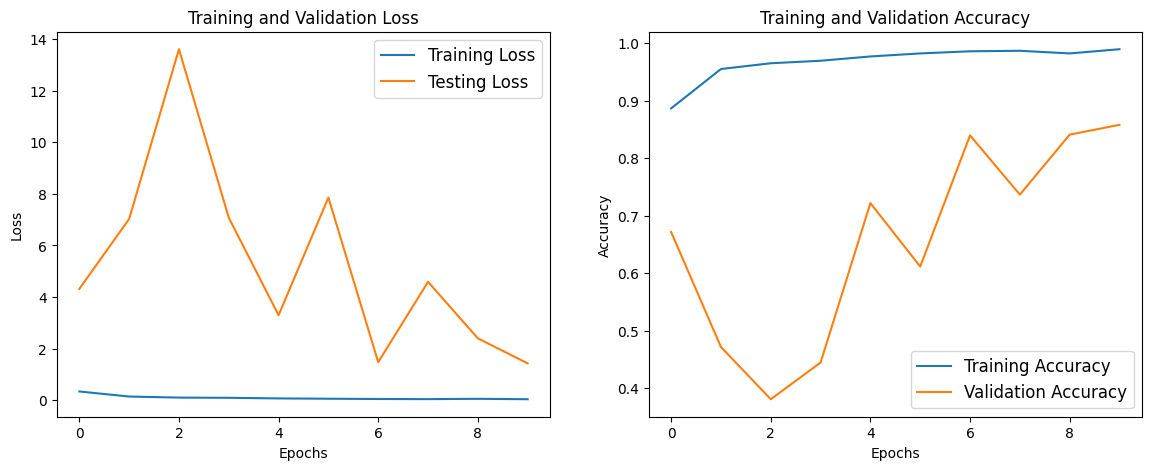

In [63]:
# plot graph 
plot_graph(history_ft)

# Overfitting between training and validation 
# Final accuracy after fine tuning 10 epochs is down score in training 0.99% 
# and vaildaion 0.96% (worse than transfer learning)
# Loss function after training 25 epochs is up score in training 0.04% 
# and vaildaion 0.86% (worse than transfer learning)
# Perfomance as well as baseline model  

In [65]:
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history_ft.history) 
hist_df.head()

# save to csv: 
hist_csv_file = '../model/mobilenetV2/history_mobilenetv2_ft.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [64]:
# save model after fine tuning
fineture_model.save("../model/mobilenetV2/mobilenetv2_ft.h5")